In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: GOOG
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


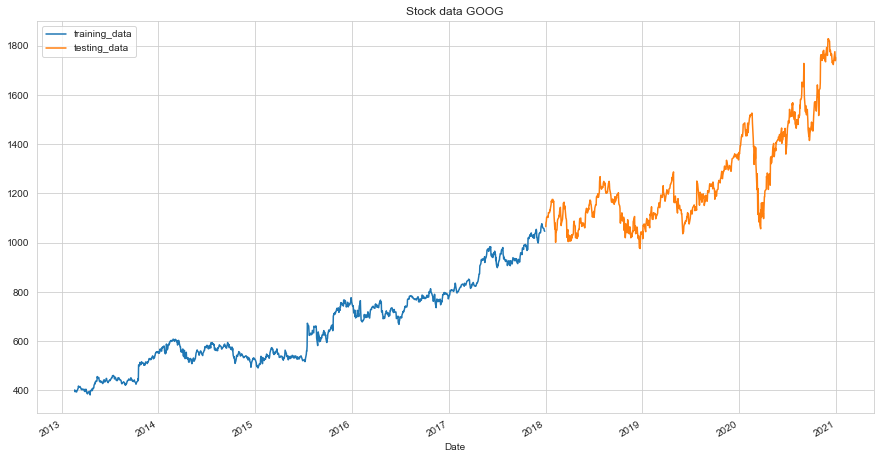

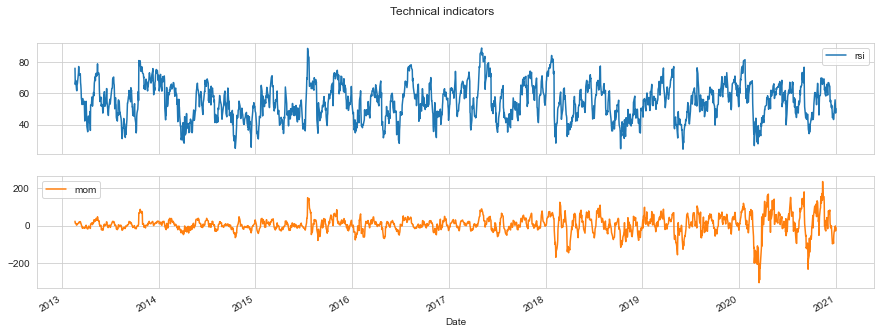

In [2]:
stock_name = 'goog'.upper()
industry = 'Communication Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1460.90, duration: 0:00:00.228051
episode: 2/2000, episode end value: 1463.95, duration: 0:00:00.222051
episode: 3/2000, episode end value: 1470.08, duration: 0:00:00.205062
episode: 4/2000, episode end value: 1462.10, duration: 0:00:00.218034
episode: 5/2000, episode end value: 1461.18, duration: 0:00:00.218049
episode: 6/2000, episode end value: 1461.64, duration: 0:00:00.243055
episode: 7/2000, episode end value: 1461.84, duration: 0:00:00.234068
episode: 8/2000, episode end value: 1462.11, duration: 0:00:00.233039
episode: 9/2000, episode end value: 1466.97, duration: 0:00:00.244053
episode: 10/2000, episode end value: 1466.09, duration: 0:00:00.228054
episode: 11/2000, episode end value: 1468.48, duration: 0:00:00.221063
episode: 12/2000, episode end value: 1466.68, duration: 0:00:00.237038
episode: 13/2000, episode end value: 1463.80, duration: 0:00:00.229066
episode: 14/2000, episode end value: 1466.57, duration: 0:00:00.243047
episode: 15/200

episode: 117/2000, episode end value: 1474.55, duration: 0:00:00.208062
episode: 118/2000, episode end value: 1490.03, duration: 0:00:00.213032
episode: 119/2000, episode end value: 1471.76, duration: 0:00:00.217062
episode: 120/2000, episode end value: 1484.79, duration: 0:00:00.214041
episode: 121/2000, episode end value: 1485.98, duration: 0:00:00.227050
episode: 122/2000, episode end value: 1460.56, duration: 0:00:00.221047
episode: 123/2000, episode end value: 1465.17, duration: 0:00:00.230055
episode: 124/2000, episode end value: 1463.32, duration: 0:00:00.230050
episode: 125/2000, episode end value: 1475.58, duration: 0:00:00.203048
episode: 126/2000, episode end value: 1465.91, duration: 0:00:00.219048
episode: 127/2000, episode end value: 1468.81, duration: 0:00:00.216037
episode: 128/2000, episode end value: 1478.29, duration: 0:00:00.225050
episode: 129/2000, episode end value: 1476.05, duration: 0:00:00.225050
episode: 130/2000, episode end value: 1477.74, duration: 0:00:00

episode: 231/2000, episode end value: 1464.52, duration: 0:00:00.267063
episode: 232/2000, episode end value: 1466.42, duration: 0:00:00.264071
episode: 233/2000, episode end value: 1467.31, duration: 0:00:00.258057
episode: 234/2000, episode end value: 1466.70, duration: 0:00:00.254073
episode: 235/2000, episode end value: 1464.46, duration: 0:00:00.262068
episode: 236/2000, episode end value: 1466.81, duration: 0:00:00.263060
episode: 237/2000, episode end value: 1463.55, duration: 0:00:00.262058
episode: 238/2000, episode end value: 1464.77, duration: 0:00:00.272053
episode: 239/2000, episode end value: 1476.56, duration: 0:00:00.257066
episode: 240/2000, episode end value: 1434.84, duration: 0:00:00.254046
episode: 241/2000, episode end value: 1472.70, duration: 0:00:00.265061
episode: 242/2000, episode end value: 1465.42, duration: 0:00:00.256047
episode: 243/2000, episode end value: 1465.93, duration: 0:00:00.269061
episode: 244/2000, episode end value: 1466.50, duration: 0:00:00

episode: 345/2000, episode end value: 1465.20, duration: 0:00:00.234050
episode: 346/2000, episode end value: 1472.94, duration: 0:00:00.245055
episode: 347/2000, episode end value: 1474.37, duration: 0:00:00.236070
episode: 348/2000, episode end value: 1468.89, duration: 0:00:00.244040
episode: 349/2000, episode end value: 1457.88, duration: 0:00:00.232051
episode: 350/2000, episode end value: 1455.96, duration: 0:00:00.251050
episode: 351/2000, episode end value: 1463.58, duration: 0:00:00.283064
episode: 352/2000, episode end value: 1463.26, duration: 0:00:00.268058
episode: 353/2000, episode end value: 1460.96, duration: 0:00:00.277065
episode: 354/2000, episode end value: 1463.15, duration: 0:00:00.317076
episode: 355/2000, episode end value: 1463.45, duration: 0:00:00.305062
episode: 356/2000, episode end value: 1464.83, duration: 0:00:00.286054
episode: 357/2000, episode end value: 1464.12, duration: 0:00:00.266061
episode: 358/2000, episode end value: 1464.42, duration: 0:00:00

episode: 459/2000, episode end value: 1464.75, duration: 0:00:00.320074
episode: 460/2000, episode end value: 1465.75, duration: 0:00:00.314078
episode: 461/2000, episode end value: 1467.77, duration: 0:00:00.306053
episode: 462/2000, episode end value: 1464.87, duration: 0:00:00.308071
episode: 463/2000, episode end value: 1468.77, duration: 0:00:00.322071
episode: 464/2000, episode end value: 1442.42, duration: 0:00:00.323072
episode: 465/2000, episode end value: 1468.10, duration: 0:00:00.301068
episode: 466/2000, episode end value: 1465.06, duration: 0:00:00.297065
episode: 467/2000, episode end value: 1468.35, duration: 0:00:00.291067
episode: 468/2000, episode end value: 1464.09, duration: 0:00:00.288063
episode: 469/2000, episode end value: 1467.42, duration: 0:00:00.302072
episode: 470/2000, episode end value: 1465.84, duration: 0:00:00.293071
episode: 471/2000, episode end value: 1466.16, duration: 0:00:00.294061
episode: 472/2000, episode end value: 1466.47, duration: 0:00:00

episode: 573/2000, episode end value: 1461.99, duration: 0:00:00.294411
episode: 574/2000, episode end value: 1469.69, duration: 0:00:00.302190
episode: 575/2000, episode end value: 1463.76, duration: 0:00:00.289364
episode: 576/2000, episode end value: 1466.25, duration: 0:00:00.290607
episode: 577/2000, episode end value: 1469.97, duration: 0:00:00.288065
episode: 578/2000, episode end value: 1465.49, duration: 0:00:00.286063
episode: 579/2000, episode end value: 1467.33, duration: 0:00:00.307071
episode: 580/2000, episode end value: 1465.18, duration: 0:00:00.282064
episode: 581/2000, episode end value: 1464.17, duration: 0:00:00.316072
episode: 582/2000, episode end value: 1465.97, duration: 0:00:00.310066
episode: 583/2000, episode end value: 1466.40, duration: 0:00:00.326073
episode: 584/2000, episode end value: 1465.05, duration: 0:00:00.334072
episode: 585/2000, episode end value: 1467.15, duration: 0:00:00.327071
episode: 586/2000, episode end value: 1464.21, duration: 0:00:00

episode: 687/2000, episode end value: 1469.68, duration: 0:00:00.321077
episode: 688/2000, episode end value: 1480.88, duration: 0:00:00.385061
episode: 689/2000, episode end value: 1485.77, duration: 0:00:00.320075
episode: 690/2000, episode end value: 1477.48, duration: 0:00:00.395089
episode: 691/2000, episode end value: 1478.13, duration: 0:00:00.316070
episode: 692/2000, episode end value: 1475.93, duration: 0:00:00.329078
episode: 693/2000, episode end value: 1488.93, duration: 0:00:00.318076
episode: 694/2000, episode end value: 1485.72, duration: 0:00:00.304066
episode: 695/2000, episode end value: 1480.27, duration: 0:00:00.353079
episode: 696/2000, episode end value: 1467.68, duration: 0:00:00.323069
episode: 697/2000, episode end value: 1468.29, duration: 0:00:00.291070
episode: 698/2000, episode end value: 1472.44, duration: 0:00:00.299080
episode: 699/2000, episode end value: 1482.45, duration: 0:00:00.286048
episode: 700/2000, episode end value: 1487.60, duration: 0:00:00

episode: 801/2000, episode end value: 1485.69, duration: 0:00:00.337200
episode: 802/2000, episode end value: 1482.90, duration: 0:00:00.336667
episode: 803/2000, episode end value: 1469.49, duration: 0:00:00.341800
episode: 804/2000, episode end value: 1475.09, duration: 0:00:00.313072
episode: 805/2000, episode end value: 1472.53, duration: 0:00:00.371081
episode: 806/2000, episode end value: 1490.50, duration: 0:00:00.331074
episode: 807/2000, episode end value: 1480.27, duration: 0:00:00.335078
episode: 808/2000, episode end value: 1486.89, duration: 0:00:00.381082
episode: 809/2000, episode end value: 1493.22, duration: 0:00:00.372086
episode: 810/2000, episode end value: 1473.63, duration: 0:00:00.308069
episode: 811/2000, episode end value: 1482.56, duration: 0:00:00.332074
episode: 812/2000, episode end value: 1490.87, duration: 0:00:00.352083
episode: 813/2000, episode end value: 1491.65, duration: 0:00:00.319070
episode: 814/2000, episode end value: 1479.75, duration: 0:00:00

episode: 915/2000, episode end value: 1494.03, duration: 0:00:00.324074
episode: 916/2000, episode end value: 1480.15, duration: 0:00:00.333074
episode: 917/2000, episode end value: 1486.30, duration: 0:00:00.397089
episode: 918/2000, episode end value: 1488.98, duration: 0:00:00.390088
episode: 919/2000, episode end value: 1480.37, duration: 0:00:00.379084
episode: 920/2000, episode end value: 1479.28, duration: 0:00:00.399087
episode: 921/2000, episode end value: 1479.49, duration: 0:00:00.417095
episode: 922/2000, episode end value: 1481.60, duration: 0:00:00.421581
episode: 923/2000, episode end value: 1473.77, duration: 0:00:00.379942
episode: 924/2000, episode end value: 1491.62, duration: 0:00:00.353077
episode: 925/2000, episode end value: 1480.44, duration: 0:00:00.404089
episode: 926/2000, episode end value: 1484.62, duration: 0:00:00.384067
episode: 927/2000, episode end value: 1480.86, duration: 0:00:00.444091
episode: 928/2000, episode end value: 1483.49, duration: 0:00:00

episode: 1029/2000, episode end value: 1480.01, duration: 0:00:00.393086
episode: 1030/2000, episode end value: 1490.79, duration: 0:00:00.371084
episode: 1031/2000, episode end value: 1484.74, duration: 0:00:00.344077
episode: 1032/2000, episode end value: 1482.33, duration: 0:00:00.379090
episode: 1033/2000, episode end value: 1484.17, duration: 0:00:00.363079
episode: 1034/2000, episode end value: 1486.91, duration: 0:00:00.358079
episode: 1035/2000, episode end value: 1481.10, duration: 0:00:00.402095
episode: 1036/2000, episode end value: 1479.94, duration: 0:00:00.396087
episode: 1037/2000, episode end value: 1463.16, duration: 0:00:00.414094
episode: 1038/2000, episode end value: 1461.96, duration: 0:00:00.381081
episode: 1039/2000, episode end value: 1466.36, duration: 0:00:00.408095
episode: 1040/2000, episode end value: 1470.80, duration: 0:00:00.384084
episode: 1041/2000, episode end value: 1465.26, duration: 0:00:00.419087
episode: 1042/2000, episode end value: 1462.98, dur

episode: 1142/2000, episode end value: 1480.82, duration: 0:00:00.516116
episode: 1143/2000, episode end value: 1481.61, duration: 0:00:00.444286
episode: 1144/2000, episode end value: 1489.22, duration: 0:00:00.407315
episode: 1145/2000, episode end value: 1493.11, duration: 0:00:00.417095
episode: 1146/2000, episode end value: 1490.68, duration: 0:00:00.523114
episode: 1147/2000, episode end value: 1479.52, duration: 0:00:00.479108
episode: 1148/2000, episode end value: 1487.87, duration: 0:00:00.506110
episode: 1149/2000, episode end value: 1484.83, duration: 0:00:00.558131
episode: 1150/2000, episode end value: 1480.56, duration: 0:00:00.545123
episode: 1151/2000, episode end value: 1486.12, duration: 0:00:00.473110
episode: 1152/2000, episode end value: 1479.66, duration: 0:00:00.489106
episode: 1153/2000, episode end value: 1492.93, duration: 0:00:00.543121
episode: 1154/2000, episode end value: 1482.31, duration: 0:00:00.450100
episode: 1155/2000, episode end value: 1488.54, dur

episode: 1255/2000, episode end value: 1474.22, duration: 0:00:00.393087
episode: 1256/2000, episode end value: 1480.81, duration: 0:00:00.415494
episode: 1257/2000, episode end value: 1492.66, duration: 0:00:00.362399
episode: 1258/2000, episode end value: 1484.36, duration: 0:00:00.364083
episode: 1259/2000, episode end value: 1485.56, duration: 0:00:00.351076
episode: 1260/2000, episode end value: 1483.58, duration: 0:00:00.369083
episode: 1261/2000, episode end value: 1484.86, duration: 0:00:00.360081
episode: 1262/2000, episode end value: 1468.11, duration: 0:00:00.377086
episode: 1263/2000, episode end value: 1470.56, duration: 0:00:00.392082
episode: 1264/2000, episode end value: 1481.64, duration: 0:00:00.363083
episode: 1265/2000, episode end value: 1482.36, duration: 0:00:00.387088
episode: 1266/2000, episode end value: 1482.82, duration: 0:00:00.362168
episode: 1267/2000, episode end value: 1494.79, duration: 0:00:00.408110
episode: 1268/2000, episode end value: 1479.61, dur

episode: 1368/2000, episode end value: 1464.59, duration: 0:00:00.497110
episode: 1369/2000, episode end value: 1460.45, duration: 0:00:00.507113
episode: 1370/2000, episode end value: 1460.21, duration: 0:00:00.444101
episode: 1371/2000, episode end value: 1472.56, duration: 0:00:00.446102
episode: 1372/2000, episode end value: 1481.63, duration: 0:00:00.430096
episode: 1373/2000, episode end value: 1474.35, duration: 0:00:00.405088
episode: 1374/2000, episode end value: 1475.85, duration: 0:00:00.422096
episode: 1375/2000, episode end value: 1479.22, duration: 0:00:00.374792
episode: 1376/2000, episode end value: 1476.45, duration: 0:00:00.420097
episode: 1377/2000, episode end value: 1489.56, duration: 0:00:00.411099
episode: 1378/2000, episode end value: 1474.64, duration: 0:00:00.377077
episode: 1379/2000, episode end value: 1489.62, duration: 0:00:00.328072
episode: 1380/2000, episode end value: 1479.92, duration: 0:00:00.333201
episode: 1381/2000, episode end value: 1492.19, dur

episode: 1481/2000, episode end value: 1483.71, duration: 0:00:00.379084
episode: 1482/2000, episode end value: 1484.31, duration: 0:00:00.315071
episode: 1483/2000, episode end value: 1482.75, duration: 0:00:00.385087
episode: 1484/2000, episode end value: 1480.11, duration: 0:00:00.401092
episode: 1485/2000, episode end value: 1478.17, duration: 0:00:00.356081
episode: 1486/2000, episode end value: 1484.95, duration: 0:00:00.366084
episode: 1487/2000, episode end value: 1483.42, duration: 0:00:00.337076
episode: 1488/2000, episode end value: 1485.48, duration: 0:00:00.384084
episode: 1489/2000, episode end value: 1481.49, duration: 0:00:00.340076
episode: 1490/2000, episode end value: 1476.19, duration: 0:00:00.376088
episode: 1491/2000, episode end value: 1466.23, duration: 0:00:00.336076
episode: 1492/2000, episode end value: 1491.87, duration: 0:00:00.314073
episode: 1493/2000, episode end value: 1479.99, duration: 0:00:00.335070
episode: 1494/2000, episode end value: 1488.16, dur

episode: 1594/2000, episode end value: 1472.59, duration: 0:00:00.344078
episode: 1595/2000, episode end value: 1484.57, duration: 0:00:00.320071
episode: 1596/2000, episode end value: 1482.08, duration: 0:00:00.327077
episode: 1597/2000, episode end value: 1481.53, duration: 0:00:00.358077
episode: 1598/2000, episode end value: 1480.91, duration: 0:00:00.326073
episode: 1599/2000, episode end value: 1492.40, duration: 0:00:00.321071
episode: 1600/2000, episode end value: 1500.38, duration: 0:00:00.361453
episode: 1601/2000, episode end value: 1482.48, duration: 0:00:00.317071
episode: 1602/2000, episode end value: 1487.66, duration: 0:00:00.335076
episode: 1603/2000, episode end value: 1486.98, duration: 0:00:00.319076
episode: 1604/2000, episode end value: 1489.07, duration: 0:00:00.349076
episode: 1605/2000, episode end value: 1480.04, duration: 0:00:00.337076
episode: 1606/2000, episode end value: 1482.86, duration: 0:00:00.353079
episode: 1607/2000, episode end value: 1471.58, dur

episode: 1707/2000, episode end value: 1477.30, duration: 0:00:00.325076
episode: 1708/2000, episode end value: 1491.51, duration: 0:00:00.329073
episode: 1709/2000, episode end value: 1485.92, duration: 0:00:00.342078
episode: 1710/2000, episode end value: 1479.92, duration: 0:00:00.326075
episode: 1711/2000, episode end value: 1479.43, duration: 0:00:00.326071
episode: 1712/2000, episode end value: 1477.97, duration: 0:00:00.320071
episode: 1713/2000, episode end value: 1475.59, duration: 0:00:00.326074
episode: 1714/2000, episode end value: 1486.63, duration: 0:00:00.325076
episode: 1715/2000, episode end value: 1486.09, duration: 0:00:00.327069
episode: 1716/2000, episode end value: 1482.59, duration: 0:00:00.350079
episode: 1717/2000, episode end value: 1474.43, duration: 0:00:00.333080
episode: 1718/2000, episode end value: 1481.71, duration: 0:00:00.308068
episode: 1719/2000, episode end value: 1478.04, duration: 0:00:00.327071
episode: 1720/2000, episode end value: 1481.46, dur

episode: 1820/2000, episode end value: 1465.19, duration: 0:00:00.382085
episode: 1821/2000, episode end value: 1466.48, duration: 0:00:00.362032
episode: 1822/2000, episode end value: 1468.35, duration: 0:00:00.386084
episode: 1823/2000, episode end value: 1468.11, duration: 0:00:00.402088
episode: 1824/2000, episode end value: 1467.18, duration: 0:00:00.356081
episode: 1825/2000, episode end value: 1466.72, duration: 0:00:00.382082
episode: 1826/2000, episode end value: 1465.74, duration: 0:00:00.413094
episode: 1827/2000, episode end value: 1467.80, duration: 0:00:00.414093
episode: 1828/2000, episode end value: 1466.99, duration: 0:00:00.462103
episode: 1829/2000, episode end value: 1469.61, duration: 0:00:00.397089
episode: 1830/2000, episode end value: 1478.01, duration: 0:00:00.415093
episode: 1831/2000, episode end value: 1467.00, duration: 0:00:00.389086
episode: 1832/2000, episode end value: 1469.63, duration: 0:00:00.344073
episode: 1833/2000, episode end value: 1485.30, dur

episode: 1933/2000, episode end value: 1472.89, duration: 0:00:00.313072
episode: 1934/2000, episode end value: 1484.27, duration: 0:00:00.299069
episode: 1935/2000, episode end value: 1487.72, duration: 0:00:00.284067
episode: 1936/2000, episode end value: 1483.80, duration: 0:00:00.301064
episode: 1937/2000, episode end value: 1487.87, duration: 0:00:00.317463
episode: 1938/2000, episode end value: 1488.85, duration: 0:00:00.316454
episode: 1939/2000, episode end value: 1491.61, duration: 0:00:00.297957
episode: 1940/2000, episode end value: 1489.87, duration: 0:00:00.319734
episode: 1941/2000, episode end value: 1487.80, duration: 0:00:00.309067
episode: 1942/2000, episode end value: 1489.58, duration: 0:00:00.311073
episode: 1943/2000, episode end value: 1490.98, duration: 0:00:00.356086
episode: 1944/2000, episode end value: 1477.52, duration: 0:00:00.327070
episode: 1945/2000, episode end value: 1485.11, duration: 0:00:00.334074
episode: 1946/2000, episode end value: 1481.10, dur

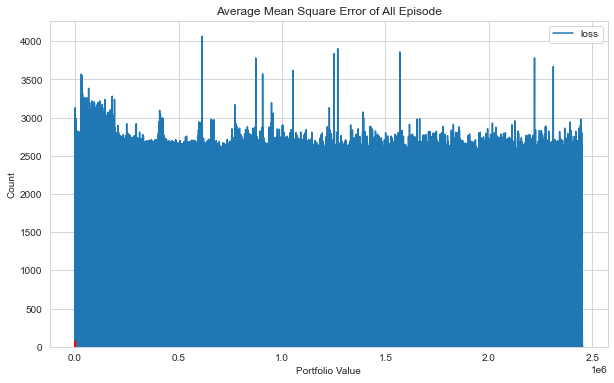

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

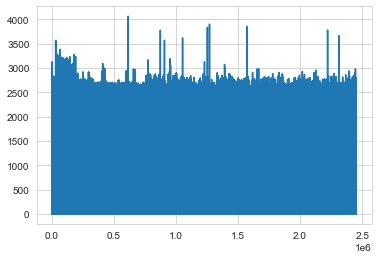

In [5]:
plt.plot(agent.model.losses)

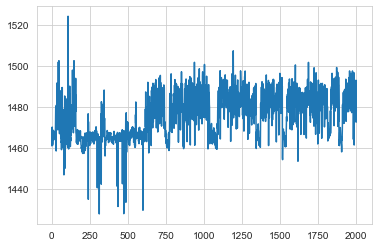

In [6]:
plt.plot(portfolio_value)

episode end value: 1295.72, duration: 0:00:00.138027
Sell: 411 times, Buy: 344 times


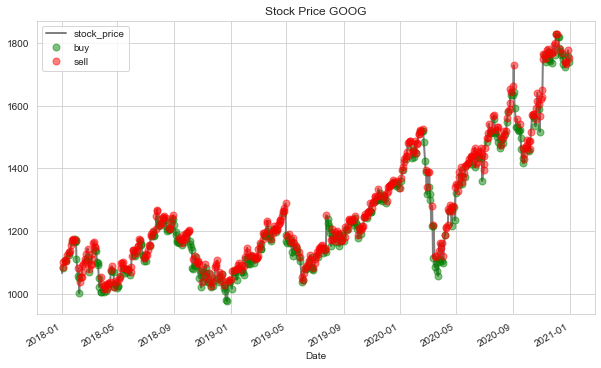

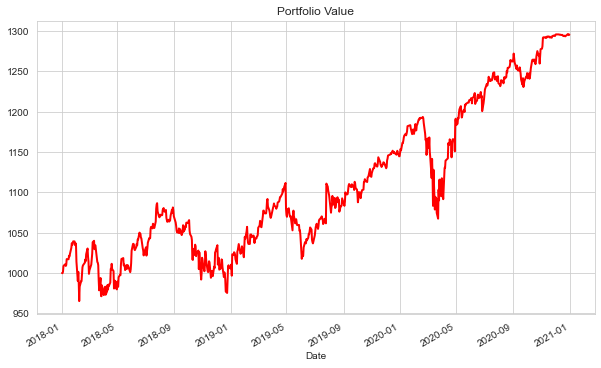

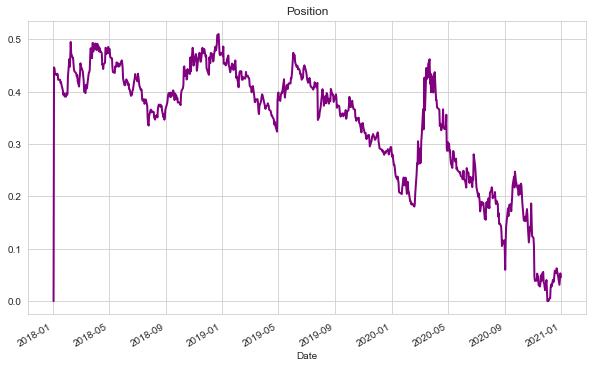

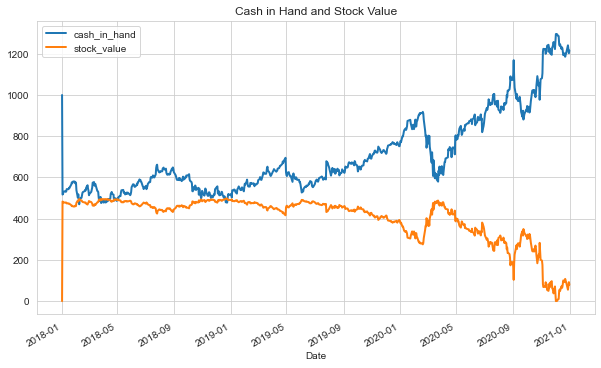

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: GOOG
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 9.02 %
Volatility: 0.1232
shape ratio: 0.6429
Maximun drawdown: -10.56 %
Calmar ratio: 0.8538
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 18.05 %
Volatility (benchmark): 0.3077
shape ratio: 0.5507
Maximun drawdown: -30.79 %
Calmar ratio (benchmark): 0.5861


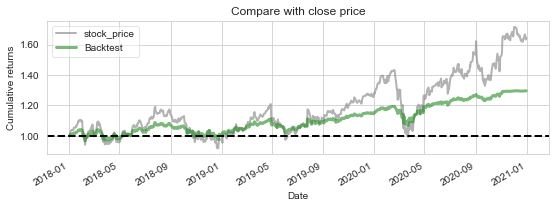

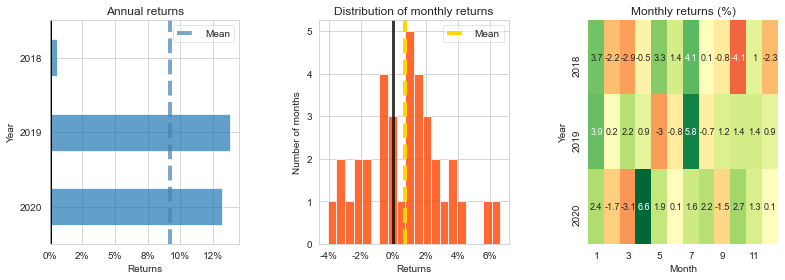

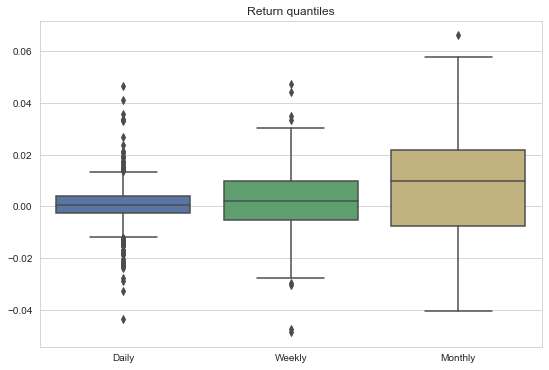

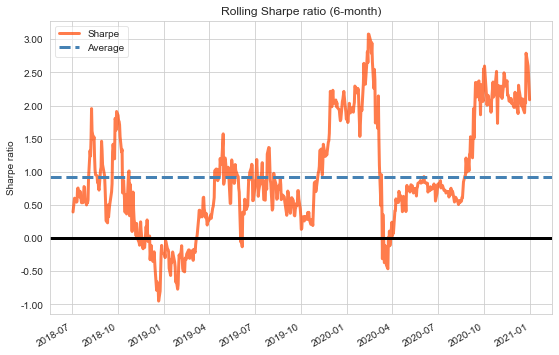

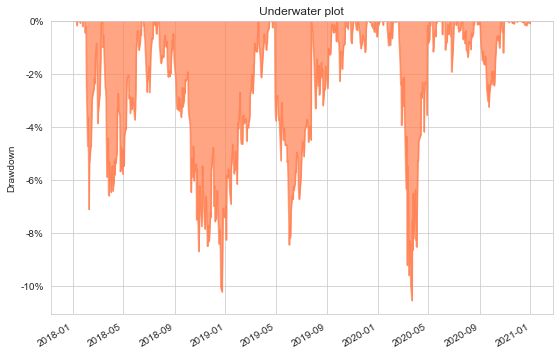

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')